<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/6_NN/3_Single_layer_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation: 50. Loss = 0.48290372
Generation: 100. Loss = 0.3686577
Generation: 150. Loss = 0.30057847
Generation: 200. Loss = 0.33395028
Generation: 250. Loss = 0.39804488
Generation: 300. Loss = 0.3173627
Generation: 350. Loss = 0.3063636
Generation: 400. Loss = 0.36630034
Generation: 450. Loss = 0.3894189
Generation: 500. Loss = 0.41092834


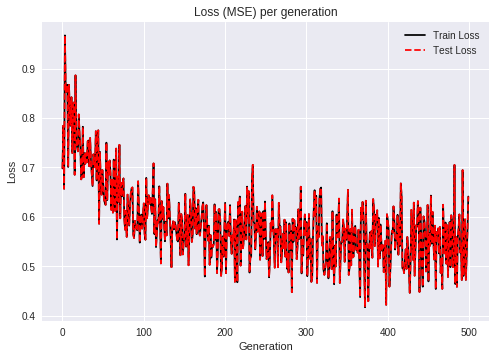

In [9]:
# 3. Implementing one layer network

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

# Load iris dataset and store the pedal length
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

# Data is of smaller size. Seed to make results visible
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

# Prepare data, 80:20 Train/Test split, normalize x-features
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
def normalize_cols(m):
  col_max = m.max(axis=0)
  col_min = m.min(axis=0)
  return (m-col_min)/(col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# Declare batch_size, placeholders for data and target
batch_size = 50
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

#Declare our model variables with correct shape. 
hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

# Declare model in two steps
# Step - 1 : Creating hidden layer output
# Step - 2 : Creating final output
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

# Mean squared error as loss function
loss = tf.reduce_mean(tf.square(y_target - final_output))

# Declare optimizing algorithm
my_opt = tf.train.GradientDescentOptimizer(0.0005)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

# Loop through training iterations
# 1. Initialize loss_vec for storage
loss_vec = []
test_loss = []
for i in range (500):
  # Select random indices for the batch
  rand_index = np.random.choice(len(x_vals_train), size=batch_size)
  # Select training values
  rand_x = x_vals_train[rand_index]
  rand_y = np.transpose([y_vals_train[rand_index]])
  # Run the training step
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
  loss_vec.append(np.sqrt(temp_loss))
  
  # Finally run the test_set loss and save it
  test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
  test_loss.append(np.sqrt(test_temp_loss))
  if (i+1) % 50 == 0:
    print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))
  
# Plot the losses
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(loss_vec, 'r--', label = 'Test Loss')
plt.title('Loss (MSE) per generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()